In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score

In [2]:
df= pd.read_csv("D:/Pyhton/Bengaluru_House_Data.csv")

In [3]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


# EDA

In [4]:
df.shape

(13320, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.drop(['availability','society'],inplace= True,axis =1)

In [7]:
df.rename(columns={'size':'size_BHK'},inplace= True)

In [8]:
df['size_BHK'] = df['size_BHK'].str[0]

In [9]:
df

,area_type,location,size_BHK,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4,3600,5.0,NaN,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4,4689,4.0,1.0,488.00


In [10]:
round((df.isnull().sum()/len(df.index))*100,2)

area_type     0.00
location      0.01
size_BHK      0.12
total_sqft    0.00
bath          0.55
balcony       4.57
price         0.00
dtype: float64

In [11]:
df.dropna(inplace= True)

In [12]:
df

,area_type,location,size_BHK,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,3,1715,3.0,3.0,112.00
13315,Built-up Area,Whitefield,5,3453,4.0,0.0,231.00
13317,Built-up Area,Raja Rajeshwari Nagar,2,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4,4689,4.0,1.0,488.00


In [13]:
df.reset_index(drop =  True, inplace= True)

In [14]:
df

,area_type,location,size_BHK,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
12705,Super built-up Area,Green Glen Layout,3,1715,3.0,3.0,112.00
12706,Built-up Area,Whitefield,5,3453,4.0,0.0,231.00
12707,Built-up Area,Raja Rajeshwari Nagar,2,1141,2.0,1.0,60.00
12708,Super built-up Area,Padmanabhanagar,4,4689,4.0,1.0,488.00


In [15]:
df.isnull().sum()

area_type     0
location      0
size_BHK      0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

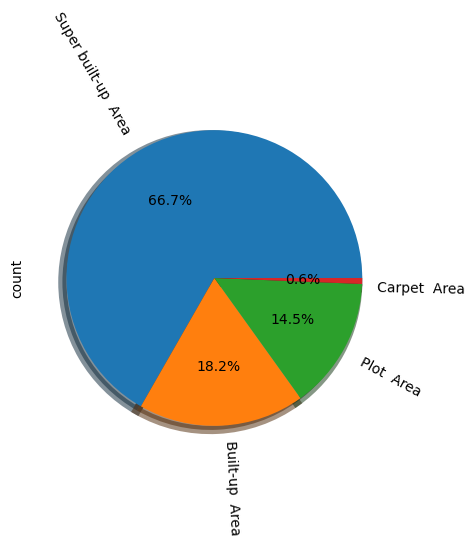

In [16]:
df['area_type'].value_counts().plot.pie(shadow = True, rotatelabels = True,radius =1 , wedgeprops = {'linewidth':6},autopct = "%.1f%%")
plt.show()

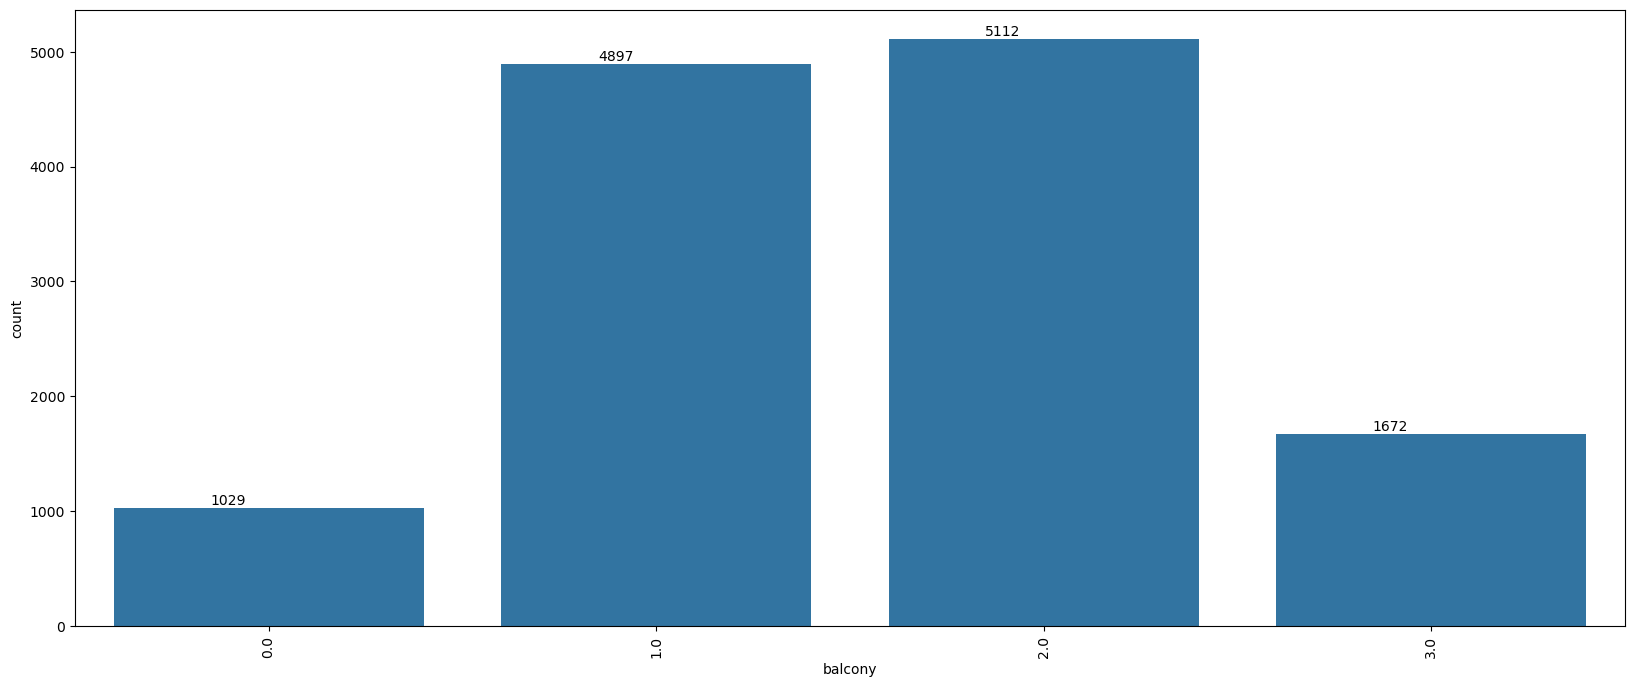

In [17]:
plt.figure(figsize = (20,8))
ax=sns.countplot(x = 'balcony', data = df)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1),va = 'bottom', color = 'black')

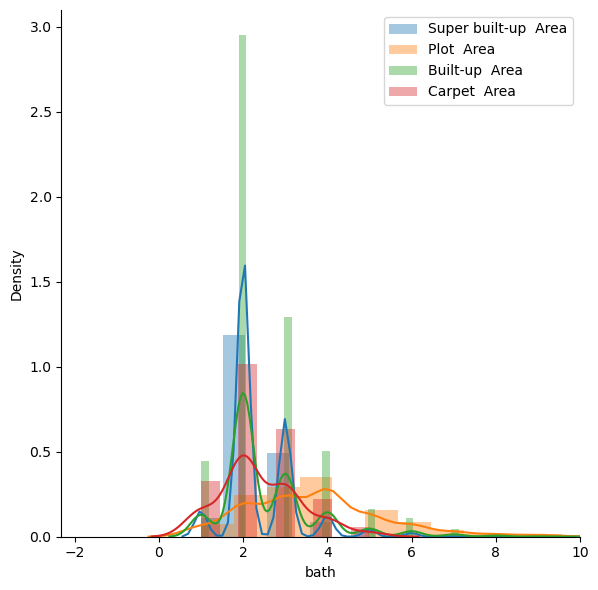

In [18]:
sns.FacetGrid(df, hue='area_type', height=6).map(sns.distplot, 'bath')
plt.xlim(right = 10)
plt.legend()
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12710 entries, 0 to 12709
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12710 non-null  object 
 1   location    12710 non-null  object 
 2   size_BHK    12710 non-null  object 
 3   total_sqft  12710 non-null  object 
 4   bath        12710 non-null  float64
 5   balcony     12710 non-null  float64
 6   price       12710 non-null  float64
dtypes: float64(3), object(4)
memory usage: 695.2+ KB


In [20]:
df['size_BHK'] = df['size_BHK'].astype(int)

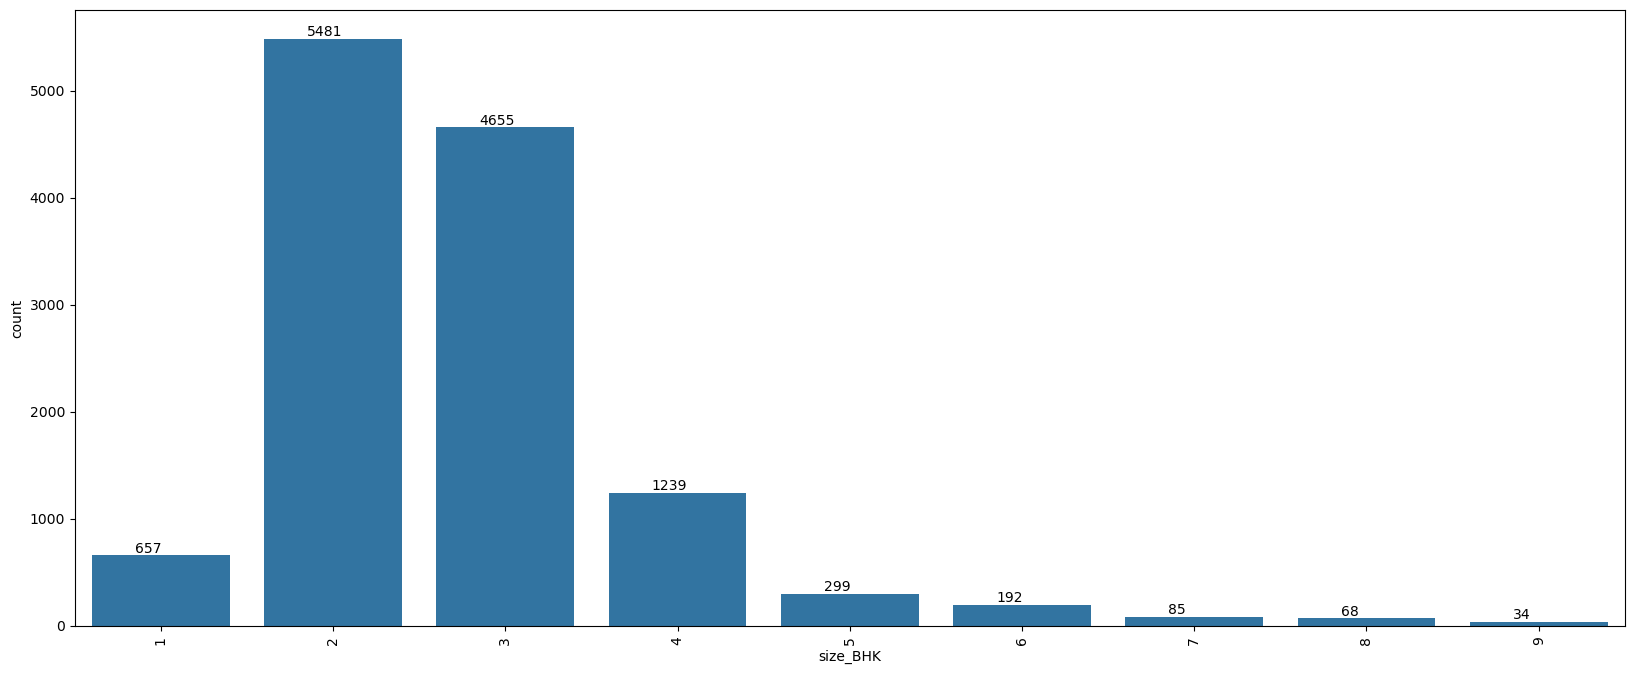

In [21]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x = 'size_BHK', data = df)
plt.xticks(rotation = 90)
for p in ax.patches: 
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

<Axes: xlabel='size_BHK', ylabel='price'>

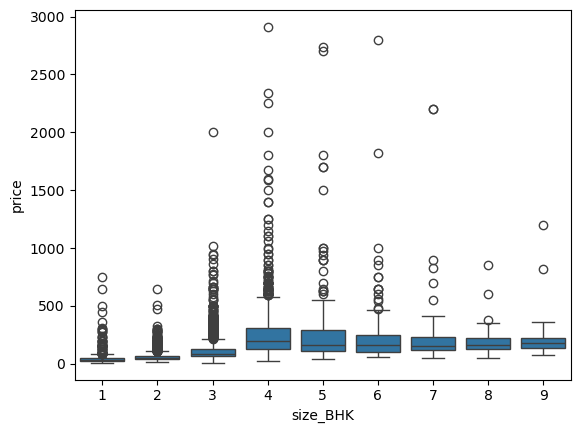

In [22]:
sns.boxplot(data = df, x = 'size_BHK', y = 'price')

In [23]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [24]:
print(df['total_sqft'].iloc[[17]])

17    600
Name: total_sqft, dtype: object


In [25]:
df[df['total_sqft'].astype(str).str.contains('-')]

,area_type,location,size_BHK,total_sqft,bath,balcony,price
27,Super built-up Area,Yelahanka,4,2100 - 2850,4.0,0.0,186.000
114,Super built-up Area,Hebbal,4,3067 - 8156,4.0,0.0,477.000
129,Super built-up Area,8th Phase JP Nagar,2,1042 - 1105,2.0,0.0,54.005
153,Super built-up Area,Sarjapur,2,1145 - 1340,2.0,0.0,43.490
176,Super built-up Area,KR Puram,2,1015 - 1540,2.0,0.0,56.800
...,...,...,...,...,...,...,...
12384,Super built-up Area,Whitefield,2,850 - 1060,2.0,0.0,38.190
12399,Super built-up Area,Talaghattapura,3,1804 - 2273,3.0,0.0,122.000
12466,Super built-up Area,Harlur,2,1200 - 1470,2.0,0.0,72.760
12660,Super built-up Area,Hoodi,2,1133 - 1384,2.0,0.0,59.135


In [26]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [27]:
df.total_sqft = df.total_sqft.apply(convert_sqft_to_num)
df = df[df.total_sqft.notnull()]

In [28]:
df

,area_type,location,size_BHK,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...
12705,Super built-up Area,Green Glen Layout,3,1715.0,3.0,3.0,112.00
12706,Built-up Area,Whitefield,5,3453.0,4.0,0.0,231.00
12707,Built-up Area,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,60.00
12708,Super built-up Area,Padmanabhanagar,4,4689.0,4.0,1.0,488.00


In [29]:
df = df[~(df.total_sqft/df.size_BHK<200)]
df.shape

(12392, 7)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12392 entries, 0 to 12709
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12392 non-null  object 
 1   location    12392 non-null  object 
 2   size_BHK    12392 non-null  int32  
 3   total_sqft  12392 non-null  float64
 4   bath        12392 non-null  float64
 5   balcony     12392 non-null  float64
 6   price       12392 non-null  float64
dtypes: float64(4), int32(1), object(2)
memory usage: 726.1+ KB


In [31]:
cont = df.select_dtypes(exclude='object')
cat = df.select_dtypes(include= 'object')

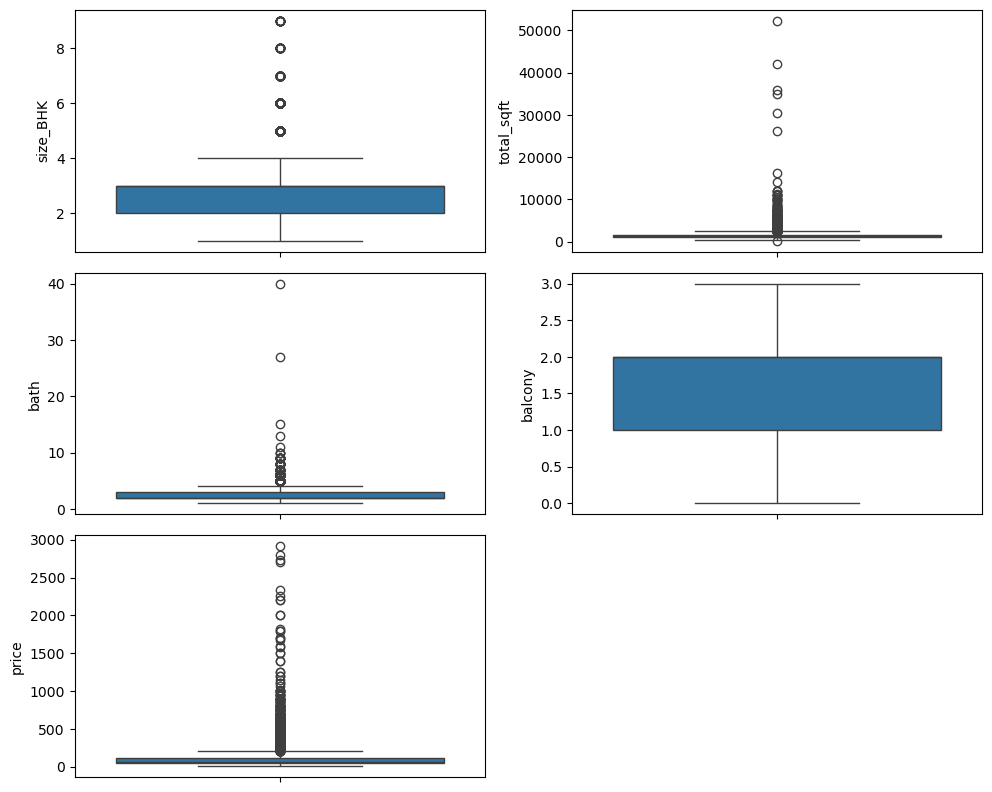

In [32]:
fig = plt.figure(figsize = (10,8))
for index,col in enumerate(cont):
    plt.subplot(3,2,index+1)
    sns.boxplot(y = cont.loc[:,col])
fig.tight_layout(pad = 1.0)

In [33]:
df.drop(df[df['bath']>6].index,inplace=True)

In [34]:
df.drop(df[df['size_BHK']>7.0].index,inplace=True)

In [35]:
df['total_price'] =df['price']*df['total_sqft']

In [36]:
df

,area_type,location,size_BHK,total_sqft,bath,balcony,price,total_price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,41257.92
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,312000.00
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00,89280.00
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,144495.00
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00,61200.00
...,...,...,...,...,...,...,...,...
12705,Super built-up Area,Green Glen Layout,3,1715.0,3.0,3.0,112.00,192080.00
12706,Built-up Area,Whitefield,5,3453.0,4.0,0.0,231.00,797643.00
12707,Built-up Area,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,60.00,68460.00
12708,Super built-up Area,Padmanabhanagar,4,4689.0,4.0,1.0,488.00,2288232.00


In [37]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.total_price)
        st = np.std(subdf.total_price)
        reduced_df = subdf[(subdf.total_price>(m-st)) & (subdf.total_price<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df

,area_type,location,size_BHK,total_sqft,bath,balcony,price,total_price
0,Super built-up Area,Devarabeesana Halli,3,1672.0,3.0,2.0,150.00,250800.0
1,Built-up Area,Devarabeesana Halli,3,1750.0,3.0,3.0,149.00,260750.0
2,Super built-up Area,Devarabeesana Halli,3,1670.0,3.0,2.0,160.00,267200.0
3,Super built-up Area,Devarabeesana Halli,3,1750.0,3.0,2.0,150.00,262500.0
4,Super built-up Area,Devarachikkanahalli,3,1250.0,2.0,3.0,44.00,55000.0
...,...,...,...,...,...,...,...,...
9914,Super built-up Area,frazertown,3,2900.0,3.0,2.0,325.00,942500.0
9915,Super built-up Area,manyata park,3,1780.0,3.0,1.0,84.83,150997.4
9916,Plot Area,tc.palya,2,1020.0,2.0,1.0,62.00,63240.0
9917,Plot Area,tc.palya,2,880.0,2.0,1.0,48.00,42240.0


<Axes: >

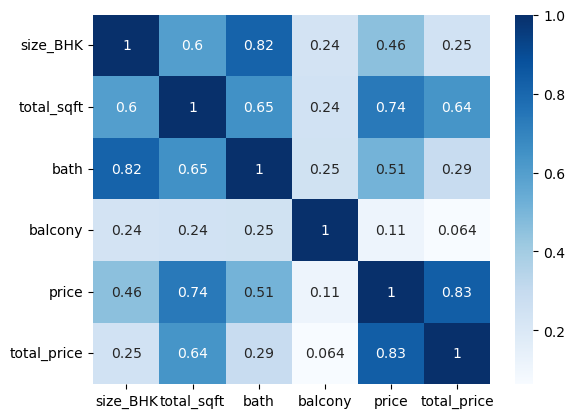

In [38]:
sns.heatmap(df.corr(numeric_only= True),cmap = 'Blues',annot=True)

In [39]:
df.drop(['area_type'],inplace= True,axis = 1)

In [40]:
df

,location,size_BHK,total_sqft,bath,balcony,price,total_price
0,Devarabeesana Halli,3,1672.0,3.0,2.0,150.00,250800.0
1,Devarabeesana Halli,3,1750.0,3.0,3.0,149.00,260750.0
2,Devarabeesana Halli,3,1670.0,3.0,2.0,160.00,267200.0
3,Devarabeesana Halli,3,1750.0,3.0,2.0,150.00,262500.0
4,Devarachikkanahalli,3,1250.0,2.0,3.0,44.00,55000.0
...,...,...,...,...,...,...,...
9914,frazertown,3,2900.0,3.0,2.0,325.00,942500.0
9915,manyata park,3,1780.0,3.0,1.0,84.83,150997.4
9916,tc.palya,2,1020.0,2.0,1.0,62.00,63240.0
9917,tc.palya,2,880.0,2.0,1.0,48.00,42240.0


In [41]:
df['location'].value_counts()[df['location'].value_counts()>=10]

location
Whitefield             481
Sarjapur  Road         351
Electronic City        282
Kanakpura Road         241
Thanisandra            210
                      ... 
Arekere                 10
Sector 7 HSR Layout     10
Bharathi Nagar          10
Bommenahalli            10
BEML Layout             10
Name: count, Length: 197, dtype: int64

In [42]:
df['location'].value_counts()

location
Whitefield         481
Sarjapur  Road     351
Electronic City    282
Kanakpura Road     241
Thanisandra        210
                  ... 
Nobo Nagar           1
CQAL Layout          1
Omarbagh Layout      1
Omkar Nagar          1
Palanahalli          1
Name: count, Length: 771, dtype: int64

In [43]:
df['location'].value_counts()>=10

location
Whitefield          True
Sarjapur  Road      True
Electronic City     True
Kanakpura Road      True
Thanisandra         True
                   ...  
Nobo Nagar         False
CQAL Layout        False
Omarbagh Layout    False
Omkar Nagar        False
Palanahalli        False
Name: count, Length: 771, dtype: bool

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [45]:
df['location'] = le.fit_transform(df['location'])
df

,location,size_BHK,total_sqft,bath,balcony,price,total_price
0,0,3,1672.0,3.0,2.0,150.00,250800.0
1,0,3,1750.0,3.0,3.0,149.00,260750.0
2,0,3,1670.0,3.0,2.0,160.00,267200.0
3,0,3,1750.0,3.0,2.0,150.00,262500.0
4,1,3,1250.0,2.0,3.0,44.00,55000.0
...,...,...,...,...,...,...,...
9914,768,3,2900.0,3.0,2.0,325.00,942500.0
9915,769,3,1780.0,3.0,1.0,84.83,150997.4
9916,770,2,1020.0,2.0,1.0,62.00,63240.0
9917,770,2,880.0,2.0,1.0,48.00,42240.0


In [46]:
X = df.drop(['total_price'],axis=1)
X

,location,size_BHK,total_sqft,bath,balcony,price
0,0,3,1672.0,3.0,2.0,150.00
1,0,3,1750.0,3.0,3.0,149.00
2,0,3,1670.0,3.0,2.0,160.00
3,0,3,1750.0,3.0,2.0,150.00
4,1,3,1250.0,2.0,3.0,44.00
...,...,...,...,...,...,...
9914,768,3,2900.0,3.0,2.0,325.00
9915,769,3,1780.0,3.0,1.0,84.83
9916,770,2,1020.0,2.0,1.0,62.00
9917,770,2,880.0,2.0,1.0,48.00


In [47]:
y = df['total_price']
y

0       250800.0
1       260750.0
2       267200.0
3       262500.0
4        55000.0
          ...   
9914    942500.0
9915    150997.4
9916     63240.0
9917     42240.0
9918     55000.0
Name: total_price, Length: 9919, dtype: float64

In [48]:
from sklearn import preprocessing
sc = preprocessing.StandardScaler()
X1 = sc.fit_transform(X)
X1

array([[-1.85522109,  0.62720847,  0.55648254,  0.759317  ,  0.53687278,
         0.76558861],
       [-1.85522109,  0.62720847,  0.70107347,  0.759317  ,  1.80963595,
         0.75365641],
       [-1.85522109,  0.62720847,  0.55277508,  0.759317  ,  0.53687278,
         0.88491062],
       ...,
       [ 1.60462259, -0.66727359, -0.6521494 , -0.47985137, -0.73589039,
        -0.28444502],
       [ 1.60462259, -0.66727359, -0.91167159, -0.47985137, -0.73589039,
        -0.45149582],
       [ 1.60462259, -0.66727359, -0.689224  , -0.47985137, -0.73589039,
        -0.36797042]])

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.20,random_state=10)

In [50]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [51]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(alpha=1.0),
    'Elastic Net': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
}

model_names = []
mae_Accuracy=[]
mse_Accuracy=[]
r2_Accuracy=[]
results=[]

for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test, y_pred)
    mean_score = cross_val_score(model, X_train, y_train, cv=10).mean()
    model_names.append(model.__class__.__name__)
    mae_Accuracy.append(mae)
    mse_Accuracy.append(mse)
    r2_Accuracy.append(r2)
    results.append( mean_score)

In [52]:
model_df = pd.DataFrame({
    'Model': model_names,
    'mae_Accuracy': mae_Accuracy,
    'mse_Accuracy': mse_Accuracy,
    'cv_accuracy' : results
        })

In [53]:
model_df.sort_values(by='cv_accuracy',ascending=False)

,Model,mae_Accuracy,mse_Accuracy,cv_accuracy
6,GradientBoostingRegressor,7207.330765,5.241803e+09,0.932832
4,DecisionTreeRegressor,7446.124113,8.608563e+09,0.926957
5,RandomForestRegressor,5160.870636,1.841031e+10,0.922082
3,ElasticNet,60397.146952,1.581262e+11,0.772303
1,Ridge,99681.786605,1.080478e+11,0.611223
2,Lasso,99702.074663,1.080352e+11,0.611055
0,LinearRegression,99702.994018,1.080348e+11,0.611050
